In [ ]:
# !pip install arff
import pandas as pd
import numpy as np

# with open('Autism-Child-Data.arff','r') as f:
#     data = arff.load(f)


# attributes = [attr[0] for attr in data['attributes']]
# instances = [list(instance) for instance in data['data']]
# df = pd.DataFrame(instances, columns=attributes)
df = pd.read_csv('/content/Autism-Child-Data.csv')

#Printing the columns
print(df.columns)

Index(['Unnamed: 0', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score',
       'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')


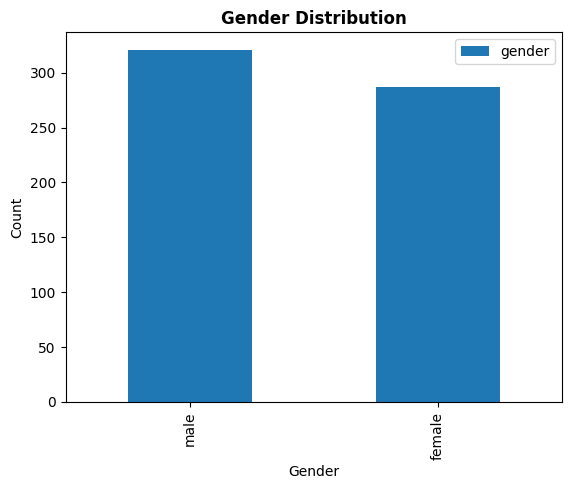

In [ ]:
import matplotlib.pyplot as plt

# plotting distribution of gender
df['gender'].value_counts().rename({"m":"male" , "f":"female"}).plot(kind='bar')
plt.title("Gender Distribution", weight = 'bold')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend()
plt.show()

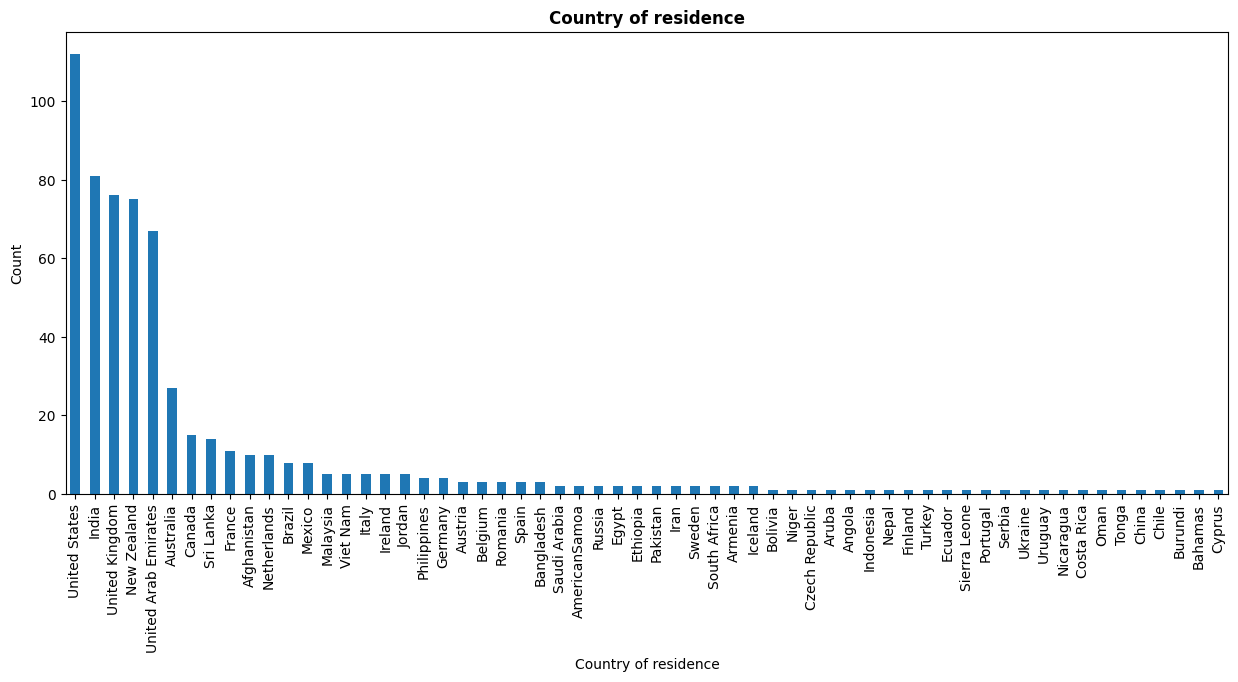

In [ ]:
# plotting distribution of country of residence
plt.figure(figsize=(15, 6))
df['contry_of_res'].value_counts().plot(kind='bar')
plt.title("Country of residence", weight='bold')
plt.xlabel("Country of residence")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()



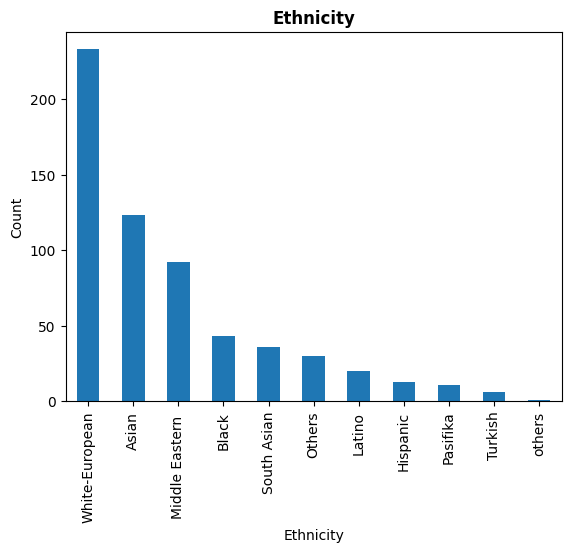

In [ ]:
# plotting ethnicity
df['ethnicity'].value_counts().plot(kind='bar')
plt.title("Ethnicity", weight = 'bold')
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.show()

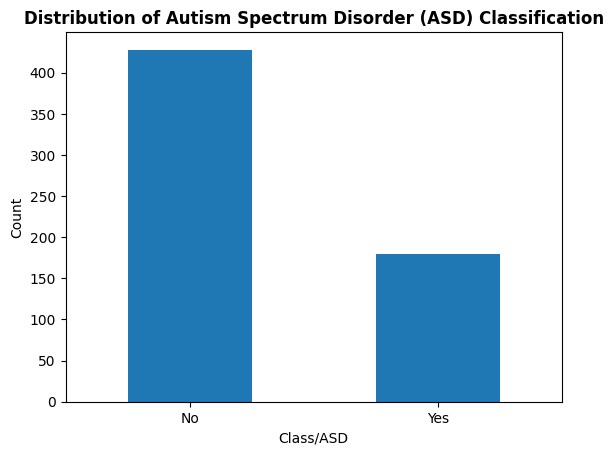

In [ ]:
# Plotting the distribution of the Class/ASD
df['Class/ASD'].value_counts().plot(kind='bar')
plt.title("Distribution of Autism Spectrum Disorder (ASD) Classification", weight='bold')
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0) # You can adjust the labels as needed
plt.show()



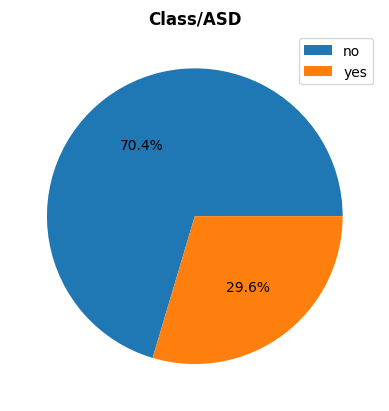

In [ ]:
# plotting pie chart of Classes

fig, ax = plt.subplots()
count = df['Class/ASD'].value_counts()
ax.pie(count, autopct = '%.1f%%')
plt.title("Class/ASD", weight = 'bold')
ax.legend(labels = ["no", "yes"])
plt.show()

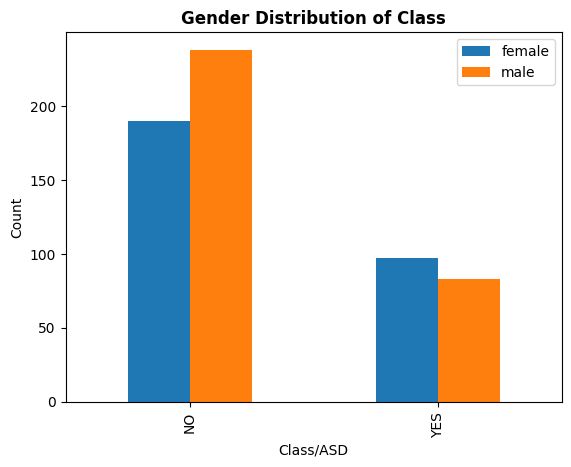

In [ ]:
# plotting distribution of gender by class
gender_group = df.groupby(["Class/ASD","gender"])
gender_group.size().unstack().plot(kind='bar')
plt.title("Gender Distribution of Class", weight = 'bold')
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.legend(labels =["female","male"])
plt.show()

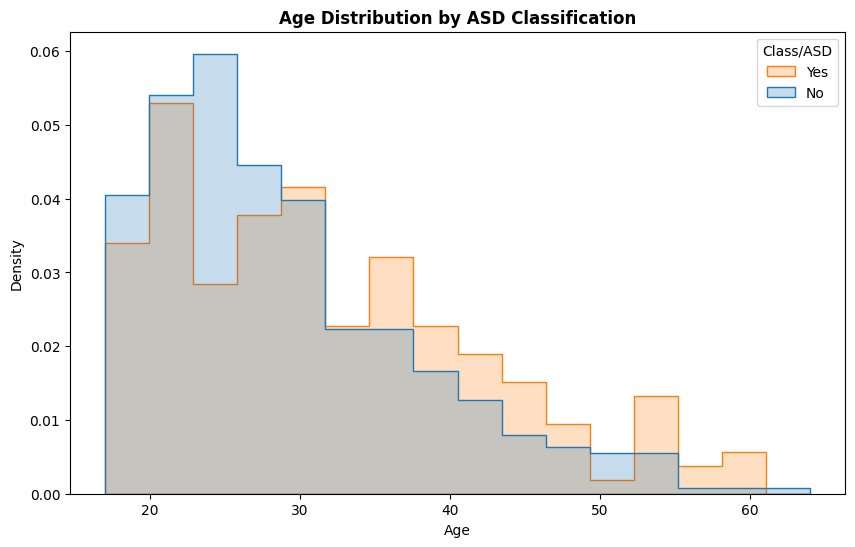

In [ ]:
import seaborn as sns

# Convert the 'age' column to numeric, as it might be stored as a string
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Plotting the distribution of age for both ASD classifications
plt.figure(figsize=(10, 6))
sns.histplot(df, x='age', hue='Class/ASD', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by ASD Classification', weight='bold')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Class/ASD', labels=['Yes', 'No'])
plt.show()


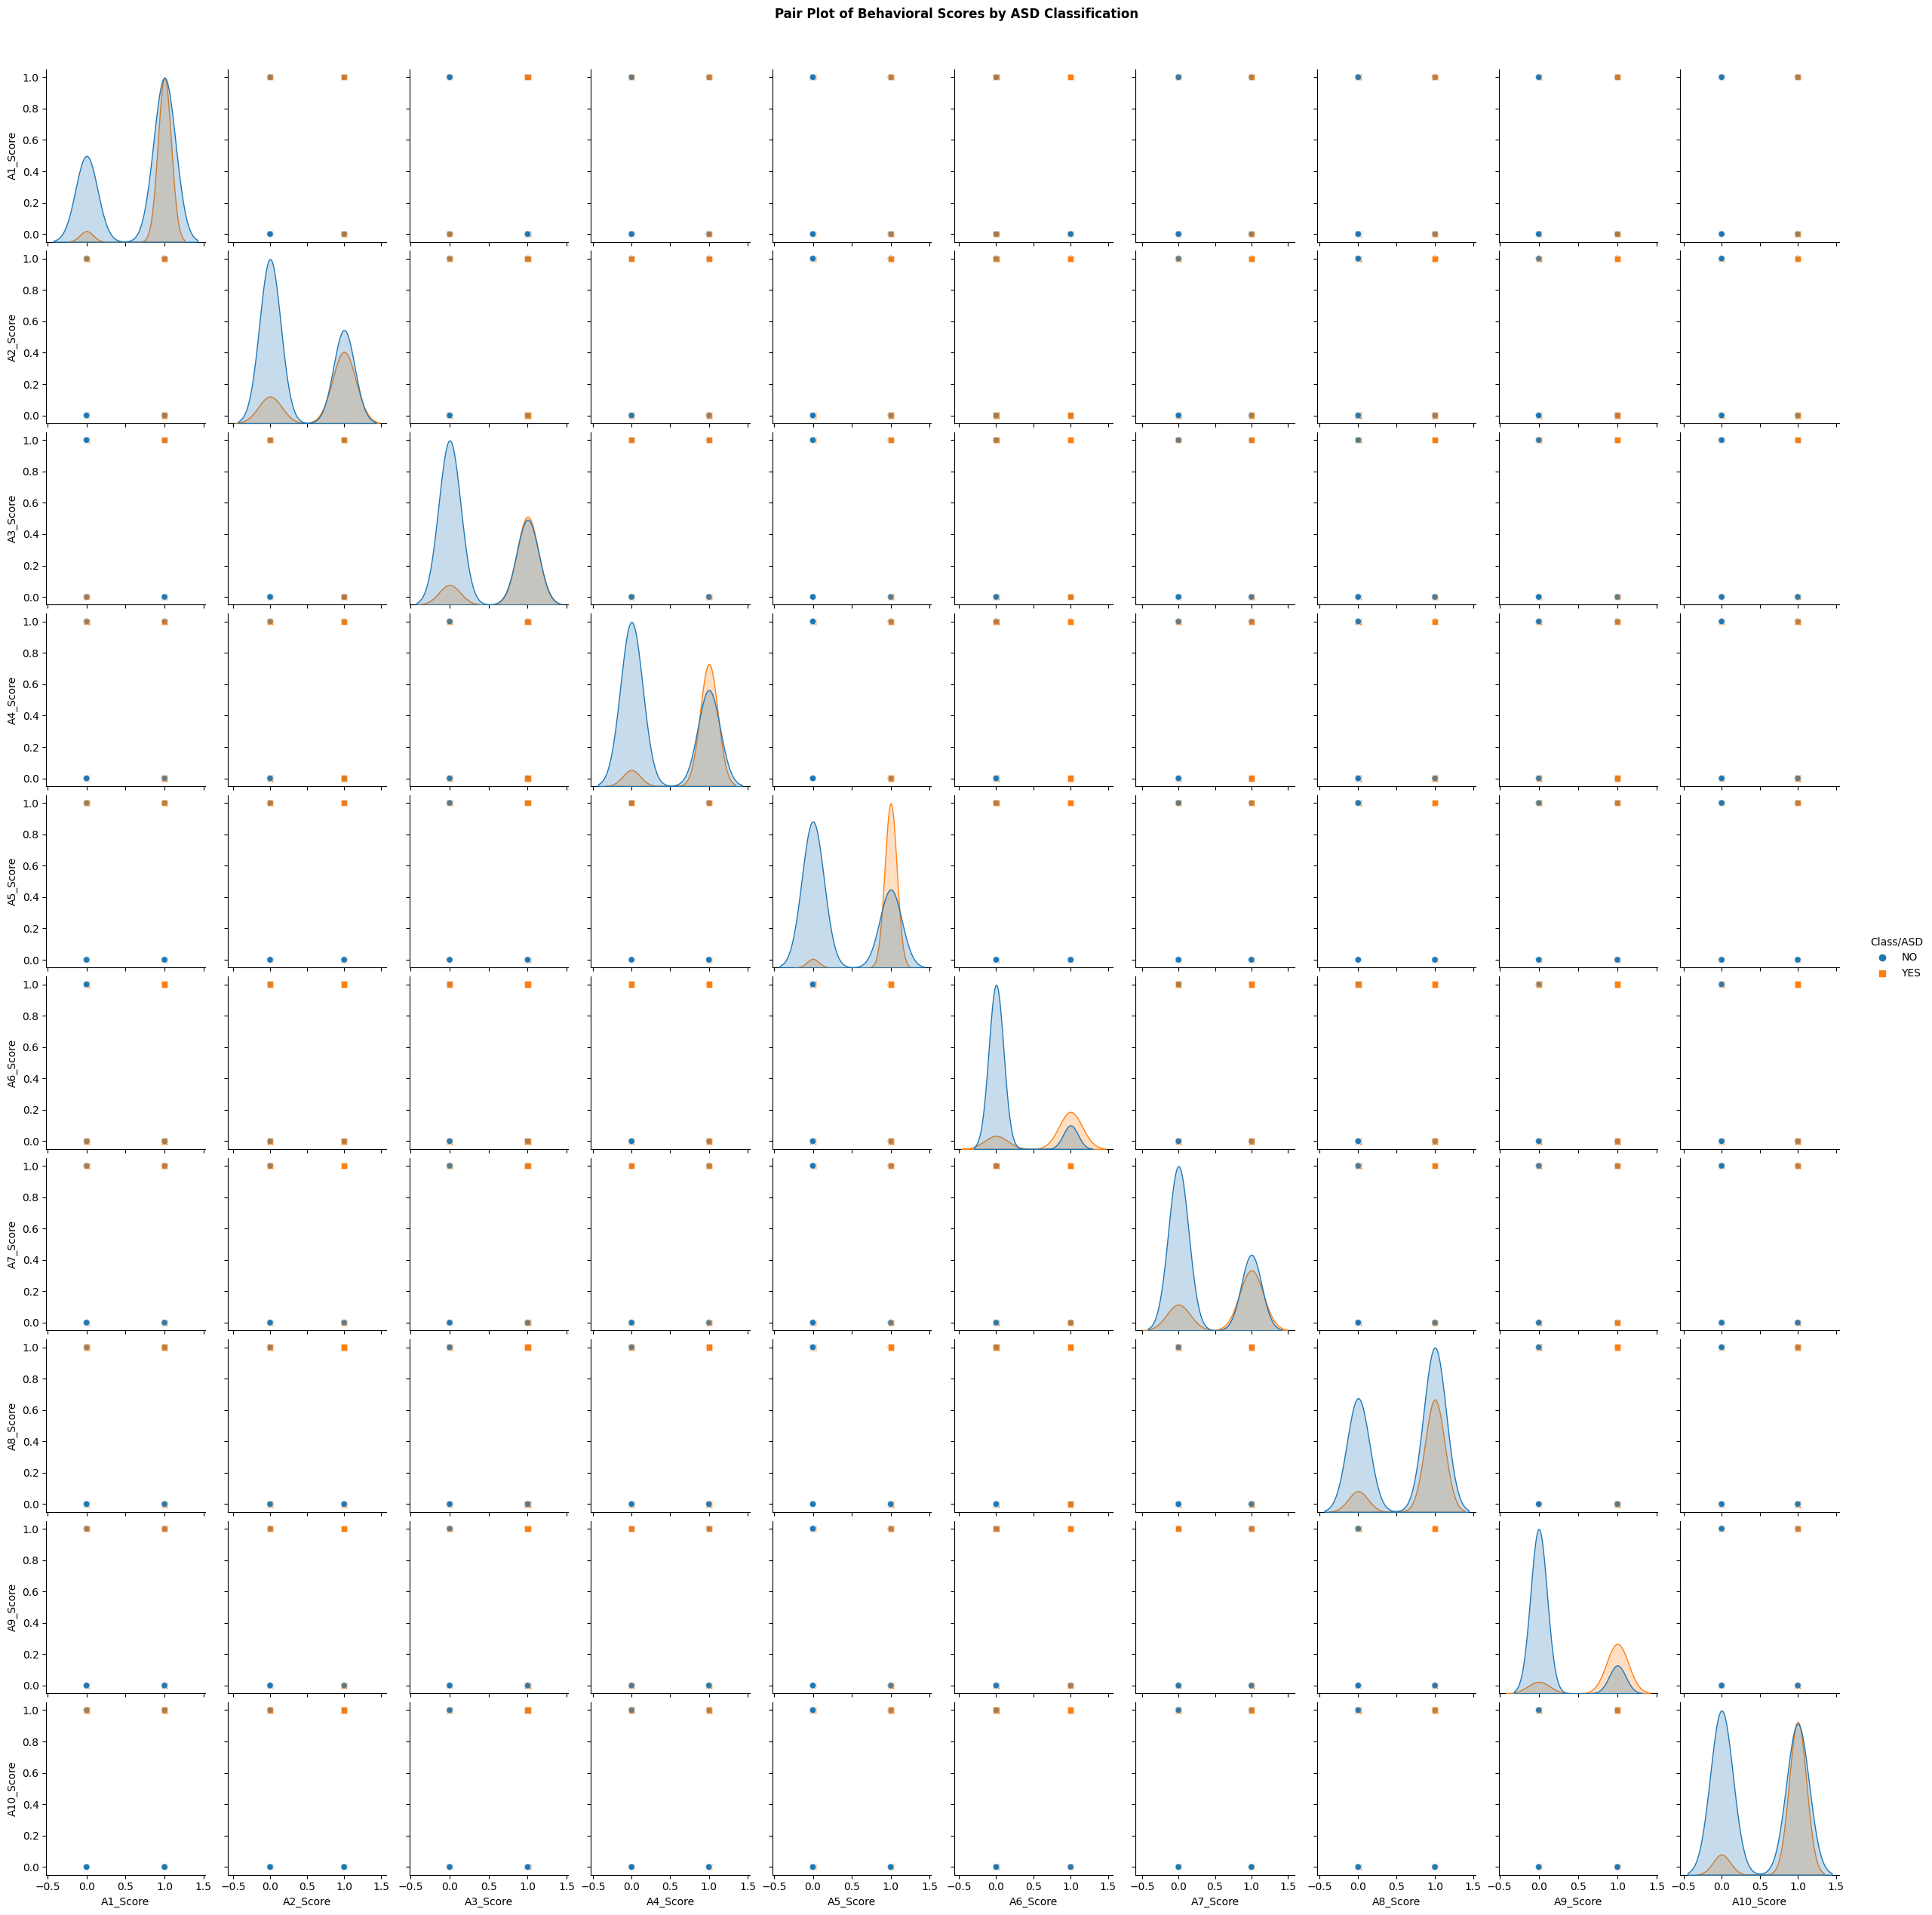

In [ ]:
import seaborn as sns

# Selecting the behavioral scores and the target variable
selected_features = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Class/ASD']

# Creating a pair plot
sns.pairplot(df[selected_features], hue='Class/ASD', diag_kind='kde', markers=['o', 's'], plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Behavioral Scores by ASD Classification', y=1.02, weight='bold')
plt.show()


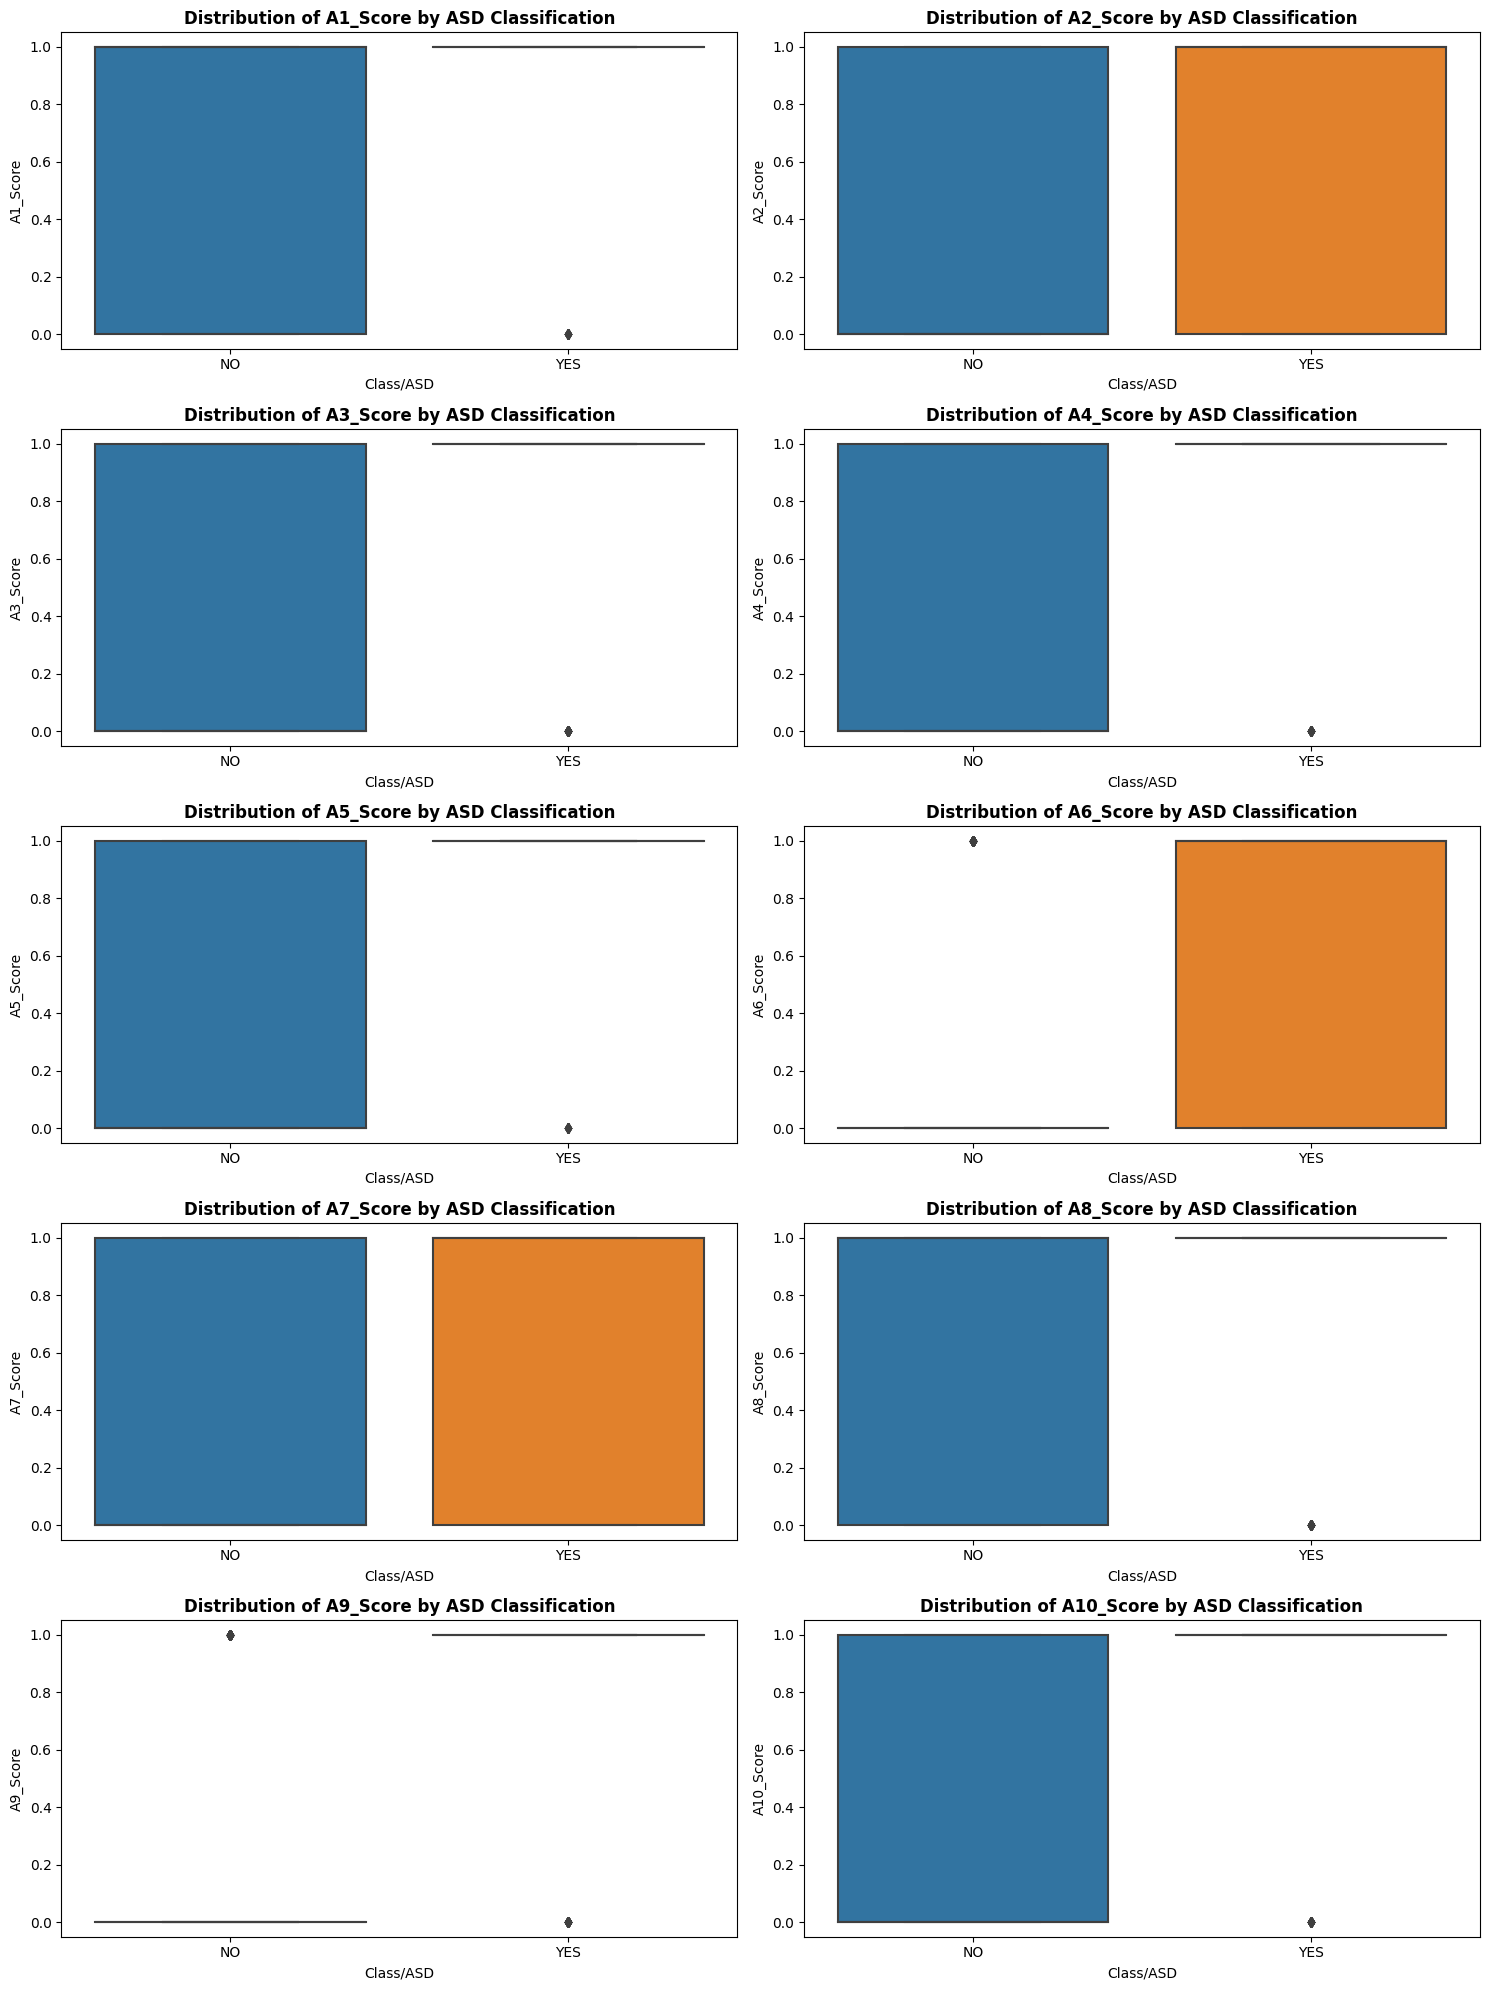

In [ ]:
import matplotlib.pyplot as plt

# Creating a subplot for each behavioral score
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

# Looping through the behavioral scores and plotting a box plot for each
for i, score in enumerate(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']):
    sns.boxplot(x='Class/ASD', y=score, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {score} by ASD Classification', weight='bold')
    axes[i].set_xlabel('Class/ASD')
    axes[i].set_ylabel(score)

plt.tight_layout()
plt.show()


<ipython-input-86-4036284dff35>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Class/ASD']].corr()


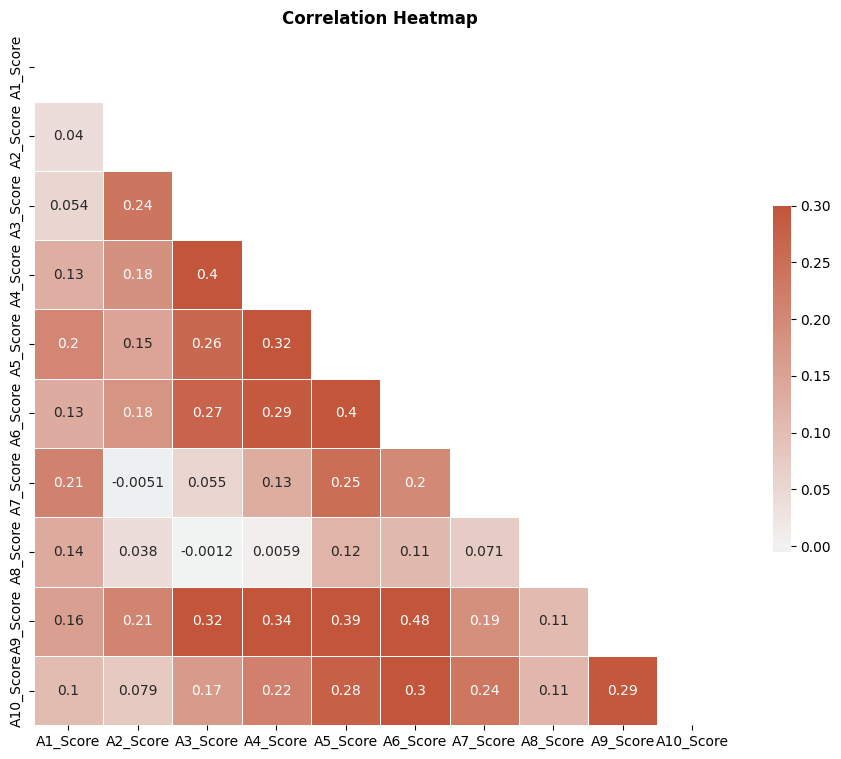

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Class/ASD']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Heatmap", weight='bold')
plt.show()


In [ ]:
## DATA CLEANING ##
# Making a copy of our df #

df_working = df.copy()

# Checking null values in any of the columns:
for i in df_working.columns:
    if df_working[i].isnull().sum() >0:
        print("Column {}, has {} Null values".format(i,df[i].isnull().sum()))

In [ ]:
print(set(df_working.age))

df_working.dropna(subset = ['age'], inplace = True)

{17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 64}


In [ ]:
df_working['ethnicity'].fillna('None', inplace=True)
df_working['relation'].fillna('None', inplace=True)

In [ ]:
print(set(df_working.ethnicity))
#Given that this is a categorical feature, we will leave the unfilled one's as "None".

{'Latino', 'Others', 'others', 'Middle Eastern ', 'South Asian', 'Asian', 'Pasifika', 'Hispanic', 'Black', 'Turkish', 'White-European'}


In [ ]:
print(set(df_working.relation))
#Also a categorical feature, we will leave this as "None"

{'Parent', 'Health care professional', 'Self', 'Relative', 'Others'}


In [ ]:
print(df_working.head())

   Unnamed: 0  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0           0         1         1         1         1         0         0   
1           1         1         1         0         1         0         0   
2           2         1         1         0         1         1         0   
3           3         1         1         0         1         0         0   
4           4         1         1         1         1         1         0   

   A7_Score  A8_Score  A9_Score  ...  gender       ethnicity jundice austim  \
0         1         1         0  ...       f  White-European      no     no   
1         0         1         0  ...       m          Latino      no    yes   
2         1         1         1  ...       m          Latino     yes    yes   
3         1         1         0  ...       f  White-European      no    yes   
4         1         1         1  ...       m          Others     yes     no   

   contry_of_res used_app_before result     age_desc  relation

In [ ]:
# As all columns that have "Score" word in it are numerical ones, we will ensure the dtype is integer

for i in df_working.columns:
    if "Score" in str(i):
        df_working[i] = df_working[i].astype(int)

#Now we will convert the categorical feature in numerical features.

categ_feats = []
for i in df_working.columns[:-1]: #exception of last column which is target
    if df_working[i].dtype == 'object':
        categ_feats.append(i)

print(categ_feats)

for column in categ_feats:
    encoded = pd.get_dummies(df[column], prefix = column)
    loc = df_working.columns.get_loc(column) + 1
    for col in encoded:
        df_working.insert(loc,col,encoded[col])
        loc += 1
    df_working = df_working.drop(column,axis =1)


['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']


In [ ]:
# Converting the target to 1's and 0's
df_working["Class/ASD"] = np.where(df_working["Class/ASD"]=='YES',1,0)

In [ ]:
print(df_working.head())

df_working = df_working.drop('result', axis = 1)

   Unnamed: 0  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0           0         1         1         1         1         0         0   
1           1         1         1         0         1         0         0   
2           2         1         1         0         1         1         0   
3           3         1         1         0         1         0         0   
4           4         1         1         1         1         1         0   

   A7_Score  A8_Score  A9_Score  ...  used_app_before_no  used_app_before_yes  \
0         1         1         0  ...                   1                    0   
1         0         1         0  ...                   1                    0   
2         1         1         1  ...                   1                    0   
3         1         1         0  ...                   1                    0   
4         1         1         1  ...                   1                    0   

   result  age_desc_18 and more  relation_Health c

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_validate

# Assiging X(features) and y(target)
X = df_working.iloc[:,:-1]
y = df_working.iloc[:,-1]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 1)

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid with the best number of neighbors
param_grid = {
    'n_neighbors': np.arange(5, 70, 1),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a K-NN classifier
knn = KNeighborsClassifier()

# Create the grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 35, 'weights': 'uniform'}
Best Score: 0.9423942772985484


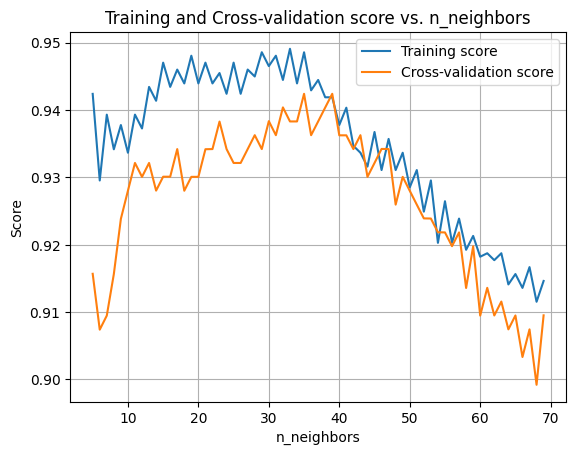

In [ ]:
# Function to plot training and cross-validation scores
def plot_scores(param_values, train_scores, cv_scores, param_name):
    plt.plot(param_values, train_scores, label='Training score')
    plt.plot(param_values, cv_scores, label='Cross-validation score')
    plt.title(f'Training and Cross-validation score vs. {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Cross-validation scores for different n_neighbors values
neighbors_train_scores = []
neighbors_cv_scores = []
# Create a K-NN classifier with the best parameters except n_neighbors
knn_for_neighbors = KNeighborsClassifier(weights=best_params['weights'],
                                         metric=best_params['metric'])

for n in range(5, 70):
    scores = cross_validate(knn_for_neighbors.set_params(n_neighbors=n), X_train_scaled, y_train, cv=5, return_train_score=True)
    neighbors_train_scores.append(scores['train_score'].mean())
    neighbors_cv_scores.append(scores['test_score'].mean())

plot_scores(range(5, 70), neighbors_train_scores, neighbors_cv_scores, 'n_neighbors')




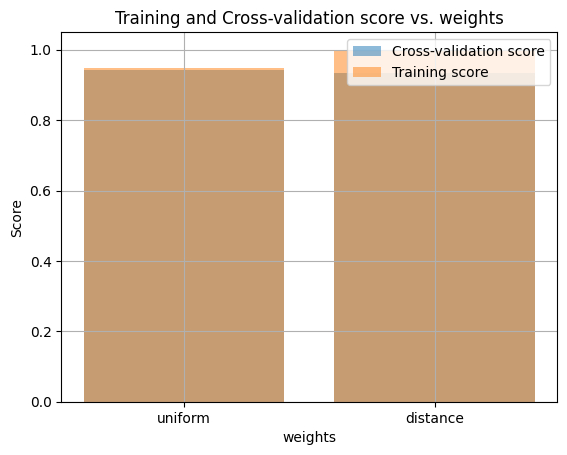

In [ ]:
# Cross-validation scores for different weights values
weights_train_scores = []
weights_cv_scores = []
# Create a K-NN classifier with the best parameters except weights
knn_for_weights = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                       metric=best_params['metric'])

for w in ['uniform', 'distance']:
    scores = cross_validate(knn_for_weights.set_params(weights=w), X_train_scaled, y_train, cv=5, return_train_score=True)
    weights_train_scores.append(scores['train_score'].mean())
    weights_cv_scores.append(scores['test_score'].mean())

plt.bar(['uniform', 'distance'], weights_cv_scores, alpha=0.5, label='Cross-validation score')
plt.bar(['uniform', 'distance'], weights_train_scores, alpha=0.5, label='Training score')
plt.title('Training and Cross-validation score vs. weights')
plt.xlabel('weights')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

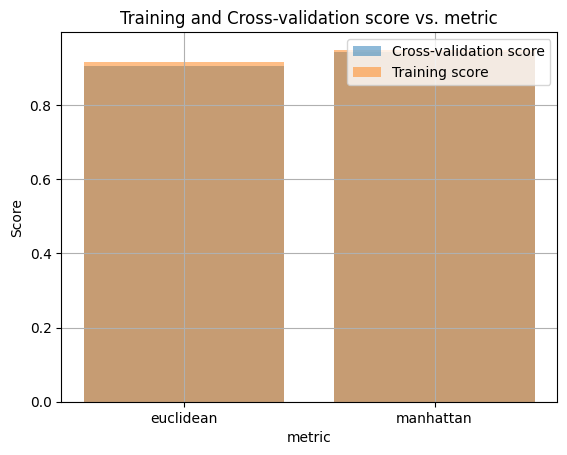

In [ ]:

# Cross-validation scores for different metric values
metric_train_scores = []
metric_cv_scores = []
# Create a K-NN classifier with the best parameters except metric
knn_for_metric = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'],
                                      weights=best_params['weights'])

for m in ['euclidean', 'manhattan']:
    scores = cross_validate(knn_for_metric.set_params(metric=m), X_train_scaled, y_train, cv=5, return_train_score=True)
    metric_train_scores.append(scores['train_score'].mean())
    metric_cv_scores.append(scores['test_score'].mean())

plt.bar(['euclidean', 'manhattan'], metric_cv_scores, alpha=0.5, label='Cross-validation score')
plt.bar(['euclidean', 'manhattan'], metric_train_scores, alpha=0.5, label='Training score')
plt.title('Training and Cross-validation score vs. metric')
plt.xlabel('metric')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Training the final model with the best parameters
knn_final = KNeighborsClassifier(**best_params)
knn_final.fit(X_train_scaled, y_train)

# Predicting the class labels for the test set
y_pred = knn_final.predict(X_test_scaled)

# Predicting the probabilities for the ROC AUC score
y_pred_proba = knn_final.predict_proba(X_test_scaled)[:, 1]

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculating the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc}')

# Evaluating the final model on the test set
print(classification_report(y_test, y_pred))


Accuracy: 0.9344262295081968
ROC AUC Score: 0.9882440476190476
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        80
           1       0.93      0.88      0.90        42

    accuracy                           0.93       122
   macro avg       0.93      0.92      0.93       122
weighted avg       0.93      0.93      0.93       122



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 20),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)
}

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Create the grid search with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')




Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Score: 0.9114454029034293


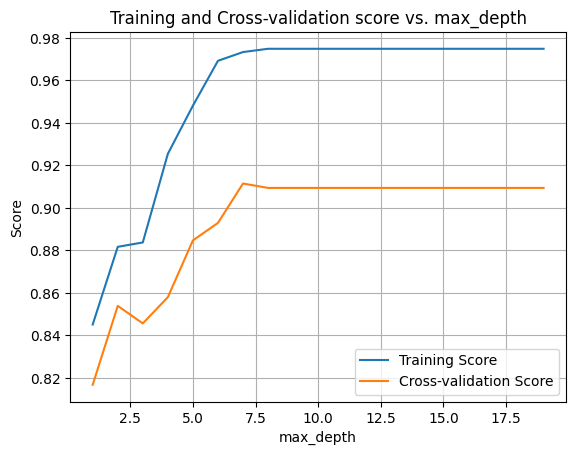

In [ ]:
# Create a Decision Tree classifier with the best parameters except max_depth
clf_for_depth = DecisionTreeClassifier(criterion=best_params['criterion'],
                                       min_samples_split=best_params['min_samples_split'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       random_state=0)

# Lists to store training and cross-validation scores
depth_train_scores = []
depth_cv_scores = []

# Loop through different max_depth values
for d in range(1, 20):
    scores = cross_validate(clf_for_depth.set_params(max_depth=d), X_train_scaled, y_train, cv=5, return_train_score=True)
    depth_train_scores.append(scores['train_score'].mean())
    depth_cv_scores.append(scores['test_score'].mean())

plt.plot(range(1, 20), depth_train_scores, label='Training Score')
plt.plot(range(1, 20), depth_cv_scores, label='Cross-validation Score')
plt.title('Training and Cross-validation score vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()





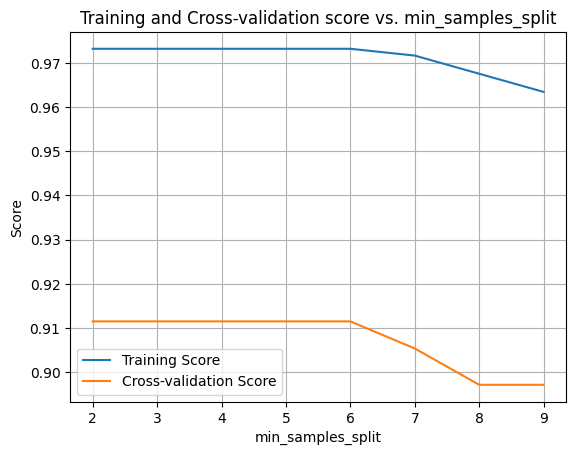

In [ ]:
# Create a Decision Tree classifier with the best parameters except min_samples_split
clf_for_split = DecisionTreeClassifier(criterion=best_params['criterion'],
                                       max_depth=best_params['max_depth'],
                                       min_samples_leaf=best_params['min_samples_leaf'],
                                       random_state=0)

# Lists to store training and cross-validation scores
split_train_scores = []
split_cv_scores = []

# Loop through different min_samples_split values
for s in range(2, 10):
    scores = cross_validate(clf_for_split.set_params(min_samples_split=s), X_train_scaled, y_train, cv=5, return_train_score=True)
    split_train_scores.append(scores['train_score'].mean())
    split_cv_scores.append(scores['test_score'].mean())

plt.plot(range(2, 10), split_train_scores, label='Training Score')
plt.plot(range(2, 10), split_cv_scores, label='Cross-validation Score')
plt.title('Training and Cross-validation score vs. min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


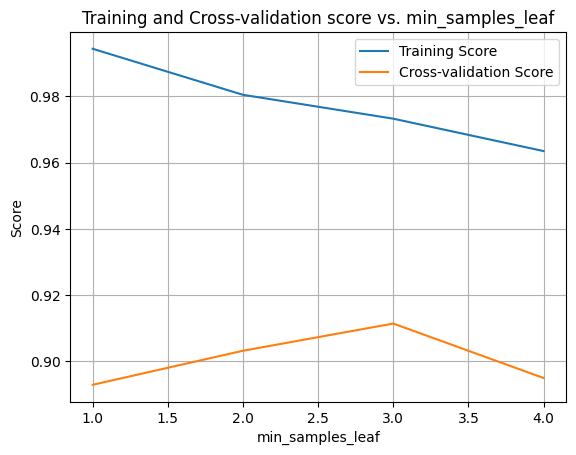

In [ ]:
# Create a Decision Tree classifier with the best parameters except min_samples_leaf
clf_for_leaf = DecisionTreeClassifier(criterion=best_params['criterion'],
                                      max_depth=best_params['max_depth'],
                                      min_samples_split=best_params['min_samples_split'],
                                      random_state=0)

# Lists to store training and cross-validation scores
leaf_train_scores = []
leaf_cv_scores = []

# Loop through different min_samples_leaf values
for l in range(1, 5):
    scores = cross_validate(clf_for_leaf.set_params(min_samples_leaf=l), X_train_scaled, y_train, cv=5, return_train_score=True)
    leaf_train_scores.append(scores['train_score'].mean())
    leaf_cv_scores.append(scores['test_score'].mean())

plt.plot(range(1, 5), leaf_train_scores, label='Training Score')
plt.plot(range(1, 5), leaf_cv_scores, label='Cross-validation Score')
plt.title('Training and Cross-validation score vs. min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
# Training the final model with the best parameters
clf_final = DecisionTreeClassifier(**best_params)
clf_final.fit(X_train_scaled, y_train)

# Predicting the probabilities for the ROC AUC score
y_pred_proba = clf_final.predict_proba(X_test_scaled)[:, 1]

y_pred = clf_final.predict(X_test_scaled)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculating the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc}')

# Evaluating the final model on the test set
y_pred = clf_final.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

Accuracy: 0.9262295081967213
ROC AUC Score: 0.9313988095238095
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        80
           1       0.88      0.90      0.89        42

    accuracy                           0.93       122
   macro avg       0.92      0.92      0.92       122
weighted avg       0.93      0.93      0.93       122

